## Softmax
### 函数讲解： https://zhuanlan.zhihu.com/p/25723112

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import os
import jieba
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import word2vec
from gensim import models
from sklearn.manifold import TSNE
# display chinese
plt.rcParams['font.sans-serif']=['SimHei']
#Add language converter
from langconv import *

In [24]:
vector1 = np.array([-10, 8, -2])

In [25]:
vector2 = np.array([-1000, 1000, 1000, 1])

In [26]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [27]:
softmax(vector1)

array([1.52292881e-08, 9.99954587e-01, 4.53978680e-05])

In [28]:
softmax(vector2)

array([0. , 0.5, 0.5, 0. ])

### 1.下载语料库并提取
### 2.处理语料库
### 3.模型训练
### 4.模型使用
#### 模型训练参考网址：https://blog.csdn.net/sinat_29957455/article/details/81432846

In [30]:
#下载并提起
#维基百科语料库下载：https://dumps.wikimedia.org/zhwiki/  
#python WikiExtractor.py -b 200M -o zhwiki zhwiki-20190720-pages-articles-multistream.xml.bz2

In [2]:
#get the stop words
file = r'D:\GitHub\Data\zhwiki\zh_stopwords.txt'
def get_stopwords(path):
    stop_words = []
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())
    return stop_words

In [3]:
stop_words = get_stopwords(file)

In [4]:
# test converter
Converter('zh-hans').convert('後羿')

'后羿'

In [5]:
#分词
def _parse(read_path, save_path, stop_words=[]):
    r_str = "[^<doc.*>$]|[^</doc>$]"    #过滤
    #read file
    file = open(read_path, 'r', encoding='utf-8')
    #write file
    output = open(save_path, 'w+', encoding='utf-8')
    
    content_line = file.readline()
    article_contents = ""
    
    while content_line:
        match_obj = re.match(r_str, content_line)
        content_line = content_line.strip("\n")
        if len(content_line) > 0:
            if match_obj:
                #分词
                words = jieba.cut(content_line, cut_all=False)
                for word in words:
                    # converter tradition to simple
                    word = Converter('zh-hans').convert(word)
                    # remove the stop words
                    if word not in stop_words:
                        article_contents += word + " "
                    else: pass
            else:    #段尾
                if len(article_contents) > 0:
                    output.write(article_contents + "\n")
                    article_contents = ""
        content_line = file.readline()
    output.close()
    
#生成结果
def generate_corpus():
    path = r"D:\GitHub\Data\zhwiki\AA"
    for i in range(7):
        _parse(os.path.join(path, str("wiki_0{}".format(i))), os.path.join(path, str("wiki_corpus0{}".format(i))), stop_words)

In [6]:
#generate_corpus()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Dracu\AppData\Local\Temp\jieba.cache
Loading model cost 0.628 seconds.
Prefix dict has been built succesfully.


In [7]:
# 合并分词后的文件
def _merge():
    output = open(r"D:\GitHub\Data\zhwiki\wiki_corpus", 'w', encoding='utf-8')
    f_input = r"D:\GitHub\Data\zhwiki\AA"
    for i in range(7):
        file_path = os.path.join(f_input, str("wiki_corpus0{}".format(i)))
        file = open(file_path, 'r', encoding='utf-8')
        line = file.readline()
        while line:
            output.writelines(line)
            line = file.readline()
        file.close()
    output.close()

In [8]:
#_merge()

gensim: https://radimrehurek.com/gensim/tutorial.html  

解决"C extension not loaded, training will be slow."  
mingw & libpython

gensim.models.word2vec.Word2Vec(sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)

In [3]:
#模型训练
sentences = word2vec.LineSentence(r"D:\GitHub\Data\zhwiki\wiki_corpus")
model = word2vec.Word2Vec(sentences, size=100, window=20, min_count=5, workers=6)
model.save(r"D:\GitHub\Data\zhwiki\wiki_corpus.model")

In [4]:
model = models.Word2Vec.load(r"D:\GitHub\Data\zhwiki\wiki_corpus.model")

In [5]:
len(model.wv.vocab)

867188

In [6]:
model.wv['好看']

array([-0.6042849 , -0.90707916,  0.5732487 , -0.77997047, -0.22956118,
        1.246611  ,  0.8213706 , -1.3069274 ,  0.52590054, -0.49307558,
       -1.3816941 ,  1.6965439 , -1.6290641 , -0.42638516, -0.48626503,
        1.0123129 , -2.2286506 ,  0.4539392 , -0.6936814 ,  0.5832833 ,
       -1.5079738 , -0.76336277, -1.1771806 , -0.34746903,  1.511208  ,
        1.6926141 ,  0.14558591,  0.08584587, -0.6833523 , -0.5744652 ,
       -1.7356629 , -0.885218  ,  0.51902306,  0.95057267,  0.64794725,
        0.7841125 , -0.13441119, -0.899095  , -2.0382006 ,  1.6802529 ,
        3.482587  , -0.5326139 ,  1.2340664 ,  0.26833117,  0.98561746,
       -0.61347264,  0.45520058, -0.69687784,  0.04545381,  2.756663  ,
       -0.88511175, -0.2179866 , -1.2825903 ,  1.8977362 , -0.5214765 ,
        1.3447127 ,  1.583202  , -1.1416562 ,  0.5303516 , -0.638798  ,
        2.4592023 , -2.0651174 ,  2.285982  , -0.99483985,  1.6098021 ,
       -1.3491062 ,  1.5657359 , -0.7437609 , -0.9532445 ,  0.08

In [7]:
#找出与指定词相似的词
result = model.wv.most_similar("好看", topn=10)
result

[('漂亮', 0.7630928754806519),
 ('十足', 0.7265257835388184),
 ('简直', 0.722131609916687),
 ('难怪', 0.7210190892219543),
 ('真是', 0.7142724990844727),
 ('实实', 0.7139840722084045),
 ('惹人', 0.7083178758621216),
 ('潇洒', 0.6907925605773926),
 ('有点', 0.6899384260177612),
 ('很漂亮', 0.689813494682312)]

In [8]:
#两个词的相似度
result = model.wv.similarity('篮球', '足球')
result

0.4360929130204867

In [9]:
#类比
res = model.wv.most_similar(['篮球', '足球', '羽毛球'], topn=10)
res

[('篮球队', 0.6557178497314453),
 ('排球', 0.6499085426330566),
 ('羽球', 0.6445412039756775),
 ('篮球联赛', 0.628057062625885),
 ('篮球员', 0.6185786128044128),
 ('国家青年队', 0.5972368121147156),
 ('橄榄球队', 0.5968039035797119),
 ('队教练', 0.59295254945755),
 ('以篮球', 0.5913898944854736),
 ('足球运动', 0.5872504115104675)]

### 可视化参考： https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [10]:
#可视化数据
def tsne_plot(model, nums):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    init_nums = 0
    for word in model.wv.vocab:
        if init_nums < nums:
            tokens.append(model.wv[word])
            labels.append(word)
        init_nums += 1
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(nums):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


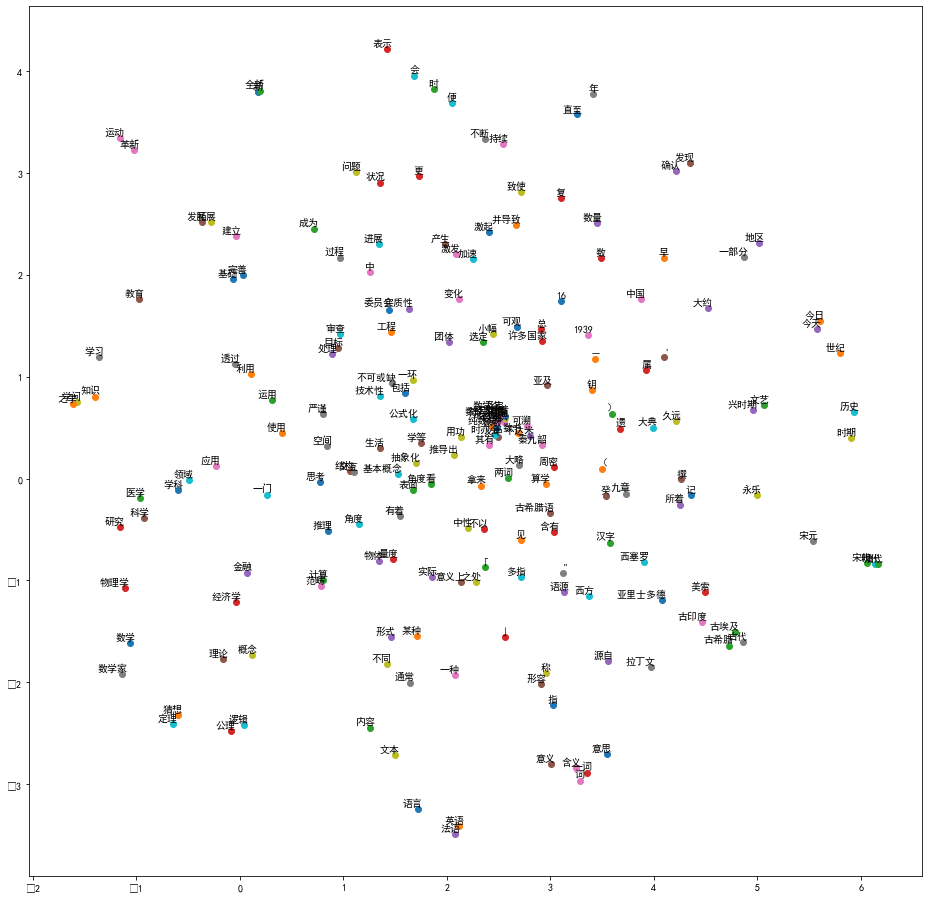

In [11]:
tsne_plot(model, 200)